In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Activation,Flatten,MaxPooling2D,Dropout

physicaldevices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physicaldevices[0],True)

%matplotlib inline

Data set - https://www.kaggle.com/datasets/tongpython/cat-and-dog
<br>
Dog - 0
<br>
Cat - 1
<br>
save the data using load_dataset.py code into pickle files
<br>
load the data and make a train and test datasets

In [2]:
pickle_in = open('X_traincat.pickle','rb')
X_orig = pickle.load(pickle_in)         #trainX
pickle_in = open('Y_traincat.pickle','rb')
Y_orig = pickle.load(pickle_in)         #trainY
Y_orig = Y_orig.reshape(Y_orig.shape[0],1)
print(X_orig.shape)
print(Y_orig.shape)

(10000, 64, 64, 3)
(10000, 1)


[1]


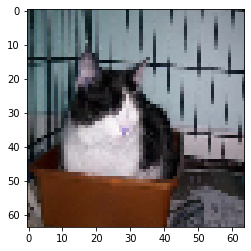

In [3]:
# Example of a picture
index = 25
plt.imshow(X_orig[index])
print(Y_orig[index])

In [4]:
train_X = X_orig[:8000,:]/255
test_X = X_orig[8000:10000,:]/255
train_Y = Y_orig[:8000,:]
test_Y = Y_orig[8000:10000,:]
print(train_X.shape)
print(test_X.shape)
print(train_Y.shape)
print(test_Y.shape)

(8000, 64, 64, 3)
(2000, 64, 64, 3)
(8000, 1)
(2000, 1)


In [5]:
model = keras.Sequential([
    keras.Input(shape=(64,64,3)),
    Conv2D(64,(3,3),padding='same',activation="relu",kernel_initializer='HeUniform'),
    MaxPooling2D(pool_size=(2,2)),
    
    Conv2D(128,(3,3),padding='same',activation="relu",kernel_initializer='HeUniform'),
    MaxPooling2D(pool_size=(2,2)),
    
    Conv2D(128,(3,3),padding='same',activation="relu",kernel_initializer='HeUniform'),
    MaxPooling2D(pool_size=(2,2)),
    
    Flatten(),
    Dense(512,activation="relu",kernel_initializer='HeUniform'),
    Dense(256,activation="relu",kernel_initializer='HeUniform'),
    Dense(128,activation='relu',kernel_initializer='HeUniform'),
    Dense(1,activation='sigmoid')
])

you can use the saved weights of my model
<br>
load the weights into model using model.load_weights('..path') after designing and before compiling the model

In [6]:
model.load_weights('savedWeights/')

In [7]:
model.compile(loss="binary_crossentropy",optimizer=keras.optimizers.Adam(learning_rate=0.001),metrics=["accuracy"])

In [8]:
# model.fit(test_X,test_Y,batch_size=32,epochs=40,verbose=2)

In [9]:
model.evaluate(test_X,test_Y,batch_size=32,verbose=2)

63/63 - 3s - loss: 0.0066 - accuracy: 0.9975 - 3s/epoch - 46ms/step


[0.006563334260135889, 0.9975000023841858]

In [10]:
print(train_X[0])
print(train_Y[0])

[[[0.38039216 0.41568627 0.43137255]
  [0.34117647 0.38039216 0.39215686]
  [0.31372549 0.34901961 0.36470588]
  ...
  [0.09019608 0.08627451 0.09803922]
  [0.08235294 0.07843137 0.09019608]
  [0.07058824 0.0745098  0.05882353]]

 [[0.37647059 0.41176471 0.42745098]
  [0.34509804 0.38039216 0.39607843]
  [0.31764706 0.35294118 0.36862745]
  ...
  [0.10588235 0.10588235 0.10588235]
  [0.09019608 0.09019608 0.09019608]
  [0.0627451  0.06666667 0.05490196]]

 [[0.37254902 0.40784314 0.42352941]
  [0.34509804 0.38039216 0.39607843]
  [0.3254902  0.36078431 0.37647059]
  ...
  [0.1372549  0.1372549  0.12941176]
  [0.11372549 0.11764706 0.10980392]
  [0.08235294 0.08235294 0.08235294]]

 ...

 [[0.80392157 0.8        0.78431373]
  [0.80392157 0.8        0.78431373]
  [0.80392157 0.8        0.78431373]
  ...
  [0.1254902  0.10588235 0.09411765]
  [0.1372549  0.11764706 0.10196078]
  [0.1254902  0.10588235 0.10196078]]

 [[0.8        0.79607843 0.78039216]
  [0.8        0.79607843 0.78039216]


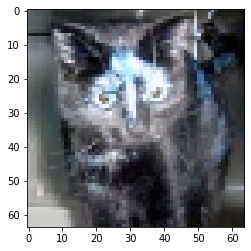

In [11]:
plt.imshow(train_X[0])

In [12]:
print(train_Y[0])

[1]


[0]


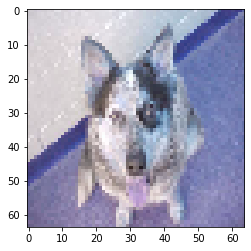

In [13]:
plt.imshow(test_X[100])
print(test_Y[100])

In [14]:
# model.save_weights('savedWeights/')